## Analyzing global internet patterns

### 📖 Background
In this notebook, as part of a competition, a dataset that highlights internet usage for different countries from 2000 to 2023 has been explored. The goal is to clean, analyze and visualize the data.
By conducting a thorough analysis, we have been able to dive deeper into how internet usage has changed over time and the countries still widely impacted by lack of internet availability. 


## 💾 Data

#### The following file has been used to get the internet usage data. This has been coupled with other data sources.

#### Internet Usage (`internet_usage.csv`)
|   Column name  |   Description | 
|---------------|-----------|
| Country Name | Name of the country |
| Country Code | Countries 3 character country code|
| 2000 | Contains the % of population of individuals using the internet in 2000  |
| 2001 | Contains the % of population of individuals using the internet in 2001  |
| 2002 | Contains the % of population of individuals using the internet in 2002  |
| 2003 | Contains the % of population of individuals using the internet in 2003  |
| .... | ...  |
| 2023 | Contains the % of population of individuals using the internet in 2023  |

### 🧾  Summary of findings

- From the internet usage data and the subsequent visualizations, it is evident that there are quite a **lot of disparities in the internet usage** around the world. 
- Inhabitants of countries in **Europe enjoy the highest amount of internet access**, while a large part of people in **Africa and south Asia do not have widespread access to internet services**. 
- On a worldwide level, access to internet facilites have **increased from <10% to 60% during the last two decades**.
- **There are some disparities within countries in a continent**, as evident from the differences in percentage of people having access to internet in a country compared to the average of the respective continent.

### 🌐 Tableau Dashboard
[The Tableau dashboard used for visualization of our internet usage analysis is available here.](
https://public.tableau.com/app/profile/samarpan.chakraborty/viz/InternetUsage_17397761505600/InternetUsageSummary?publish=yes)

#### Importing the required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
sns.set()

In [5]:
internet_df = pd.read_csv('internet_usage.csv')
internet_df.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,..,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,1.9,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Albania,ALB,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,15.0361,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,9.45119,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,..
3,American Samoa,ASM,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,10.5388,..,11.2605,13.5464,26.838,37.6058,48.9368,70.87,...,86.1,87.9,89.7,91.5675,..,90.7187,93.2056,93.8975,94.4855,..


#### Check to see if there are any missing values in the dataset

In [6]:
print(internet_df.isna().any())
print(internet_df.isna().sum())

Country Name    False
Country Code    False
2000            False
2001            False
2002            False
2003            False
2004            False
2005            False
2006            False
2007            False
2008            False
2009            False
2010            False
2011            False
2012            False
2013            False
2014            False
2015            False
2016            False
2017            False
2018            False
2019            False
2020            False
2021            False
2022            False
2023            False
dtype: bool
Country Name    0
Country Code    0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
20

**To also include the analysis on continents, the countries are first mapped to their continents by using information from the *internet*. This mapping information is then utilized to create the *Continent* column in the pandas daatframe.**

In [8]:
internet_df['Country Name'].to_csv('countries.csv')
countries_continents_info = pd.read_csv('country_continent_mapping.csv')
internet_df['Continent'] = countries_continents_info['Continent']
internet_df.replace("..", "0", inplace=True)

In [9]:
internet_df.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Continent
0,Afghanistan,AFG,0,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,1.9,...,8.26,11,13.5,16.8,17.6,18.4,0,0,0,Asia
1,Albania,ALB,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,15.0361,...,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356,Europe
2,Algeria,DZA,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,9.45119,...,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,0,Africa
3,American Samoa,ASM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Oceania
4,Andorra,AND,10.5388,0,11.2605,13.5464,26.838,37.6058,48.9368,70.87,...,87.9,89.7,91.5675,0,90.7187,93.2056,93.8975,94.4855,0,Europe


In [10]:
### Check whether every country has been succefully mapped to their respective continents.
internet_continents_unknown = internet_df[internet_df['Continent'].isin(['Unknown'])]
internet_continents_unknown

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Continent


In [11]:
internet_df.describe()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Continent
count,217,217,217,217,217,217,217,217,217,217,...,217,217,217,217,217,217,217,217,217,217
unique,217,217,196,199,201,195,197,198,198,196,...,196,199,203,175,183,191,185,178,58,7
top,"Hong Kong SAR, China",PRI,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Africa
freq,1,1,22,19,17,23,20,18,19,14,...,17,14,11,41,31,25,27,34,158,54


**It can be seen that there are only 58 unique values for 2023. It can be thus assumed, that information about the internet usage could not be collected comprehensively for all the countries in 2023. Furthermore, there are less unique values than countries in the other years, showing that it might not have been possible to collcet internet usage information for all the countries every year.** 

In [12]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  217 non-null    object
 1   Country Code  217 non-null    object
 2   2000          217 non-null    object
 3   2001          217 non-null    object
 4   2002          217 non-null    object
 5   2003          217 non-null    object
 6   2004          217 non-null    object
 7   2005          217 non-null    object
 8   2006          217 non-null    object
 9   2007          217 non-null    object
 10  2008          217 non-null    object
 11  2009          217 non-null    object
 12  2010          217 non-null    object
 13  2011          217 non-null    object
 14  2012          217 non-null    object
 15  2013          217 non-null    object
 16  2014          217 non-null    object
 17  2015          217 non-null    object
 18  2016          217 non-null    object
 19  2017    

**The variables are object type in this dataframe. This is to be converted to float type before further analysis.**

In [12]:
internet_df[internet_df.columns[2:-1]] = internet_df[internet_df.columns[2:-1]].astype('float')

In [14]:
internet_df.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Continent
0,Afghanistan,AFG,0.000000,0.004723,0.004561,0.087891,0.105809,1.22415,2.10712,1.90000,1.84,3.55,4.0,5.0,5.45455,5.9,7.0,8.26,11.0000,13.5000,16.8000,17.6000,18.4000,0.0000,0.0000,0.0000,Asia
1,Albania,ALB,0.114097,0.325798,0.390081,0.971900,2.420390,6.04389,9.60999,15.03610,23.86,41.20,45.0,47.0,49.40000,51.8,54.3,56.90,59.6000,62.4000,65.4000,68.5504,72.2377,79.3237,82.6137,83.1356,Europe
2,Algeria,DZA,0.491706,0.646114,1.591640,2.195360,4.634480,5.84394,7.37598,9.45119,10.18,11.23,12.5,14.9,18.20000,22.5,29.5,38.20,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,0.0000,Africa
3,American Samoa,ASM,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00,0.00,0.0,0.0,0.00000,0.0,0.0,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Oceania
4,Andorra,AND,10.538800,0.000000,11.260500,13.546400,26.838000,37.60580,48.93680,70.87000,70.04,78.53,81.0,81.0,82.70000,84.4,86.1,87.90,89.7000,91.5675,0.0000,90.7187,93.2056,93.8975,94.4855,0.0000,Europe


In [15]:
internet_df['Mean_internet_pop'] = internet_df.select_dtypes(include=["number"]).mean(axis=1)
internet_df.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Continent,Mean_internet_pop
0,Afghanistan,AFG,0.000000,0.004723,0.004561,0.087891,0.105809,1.22415,2.10712,1.90000,1.84,3.55,4.0,5.0,5.45455,5.9,7.0,8.26,11.0000,13.5000,16.8000,17.6000,18.4000,0.0000,0.0000,0.0000,Asia,5.155784
1,Albania,ALB,0.114097,0.325798,0.390081,0.971900,2.420390,6.04389,9.60999,15.03610,23.86,41.20,45.0,47.0,49.40000,51.8,54.3,56.90,59.6000,62.4000,65.4000,68.5504,72.2377,79.3237,82.6137,83.1356,Europe,40.734723
2,Algeria,DZA,0.491706,0.646114,1.591640,2.195360,4.634480,5.84394,7.37598,9.45119,10.18,11.23,12.5,14.9,18.20000,22.5,29.5,38.20,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,0.0000,Africa,24.426055
3,American Samoa,ASM,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00,0.00,0.0,0.0,0.00000,0.0,0.0,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Oceania,0.000000
4,Andorra,AND,10.538800,0.000000,11.260500,13.546400,26.838000,37.60580,48.93680,70.87000,70.04,78.53,81.0,81.0,82.70000,84.4,86.1,87.90,89.7000,91.5675,0.0000,90.7187,93.2056,93.8975,94.4855,0.0000,Europe,59.368379


In [16]:
index_eurasia = internet_df[internet_df['Continent'].isin(['Europe/Asia'])].index
internet_df.iloc[index_eurasia,-2] = "Russia"

In [17]:
internet_df.to_csv("internet_usage_continents.csv")

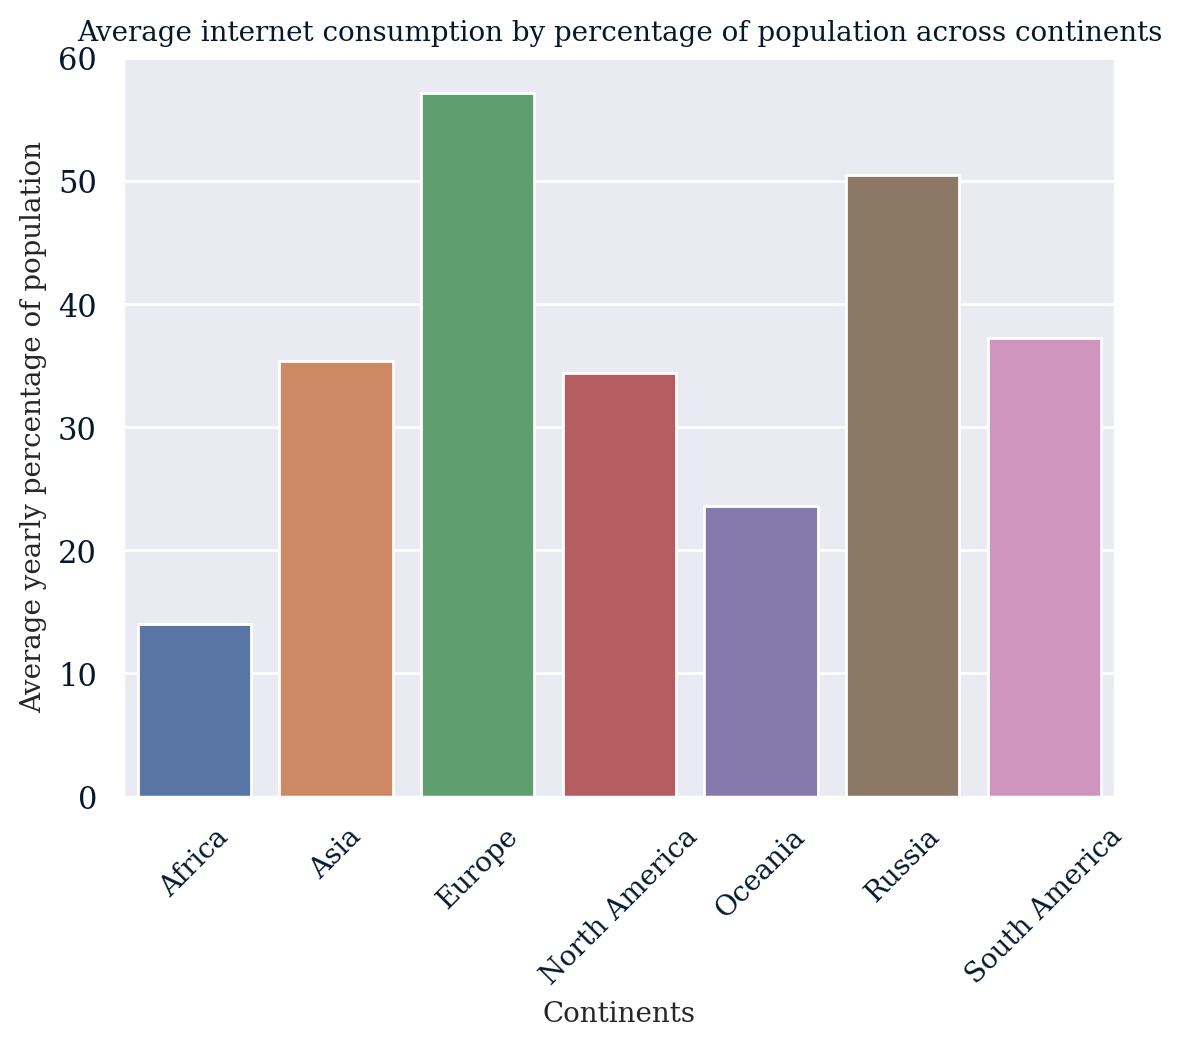

In [18]:
### PLOTTING THE INTERNET WISE MEAN INTERNET USAGE ###

internet_df_continents = internet_df.pivot_table(values='Mean_internet_pop', index='Continent')

plt.rcParams["font.family"]="serif"
plt.rcParams["font.size"] = 10

plt.figure()
ax = sns.barplot(x='Continent', y='Mean_internet_pop', data=internet_df_continents, hue="Continent")
plt.xticks(rotation=45, fontsize = 10)
plt.ylabel("Average yearly percentage of population", fontsize=10)
plt.xlabel("Continents", fontsize=10)
plt.title("Average internet consumption by percentage of population across continents", fontsize = 10)
plt.show()

#### Country wise ordering (top 10 countries)
- Bar plot of top 10 countries
- Line plot of the top 10 countries over the years

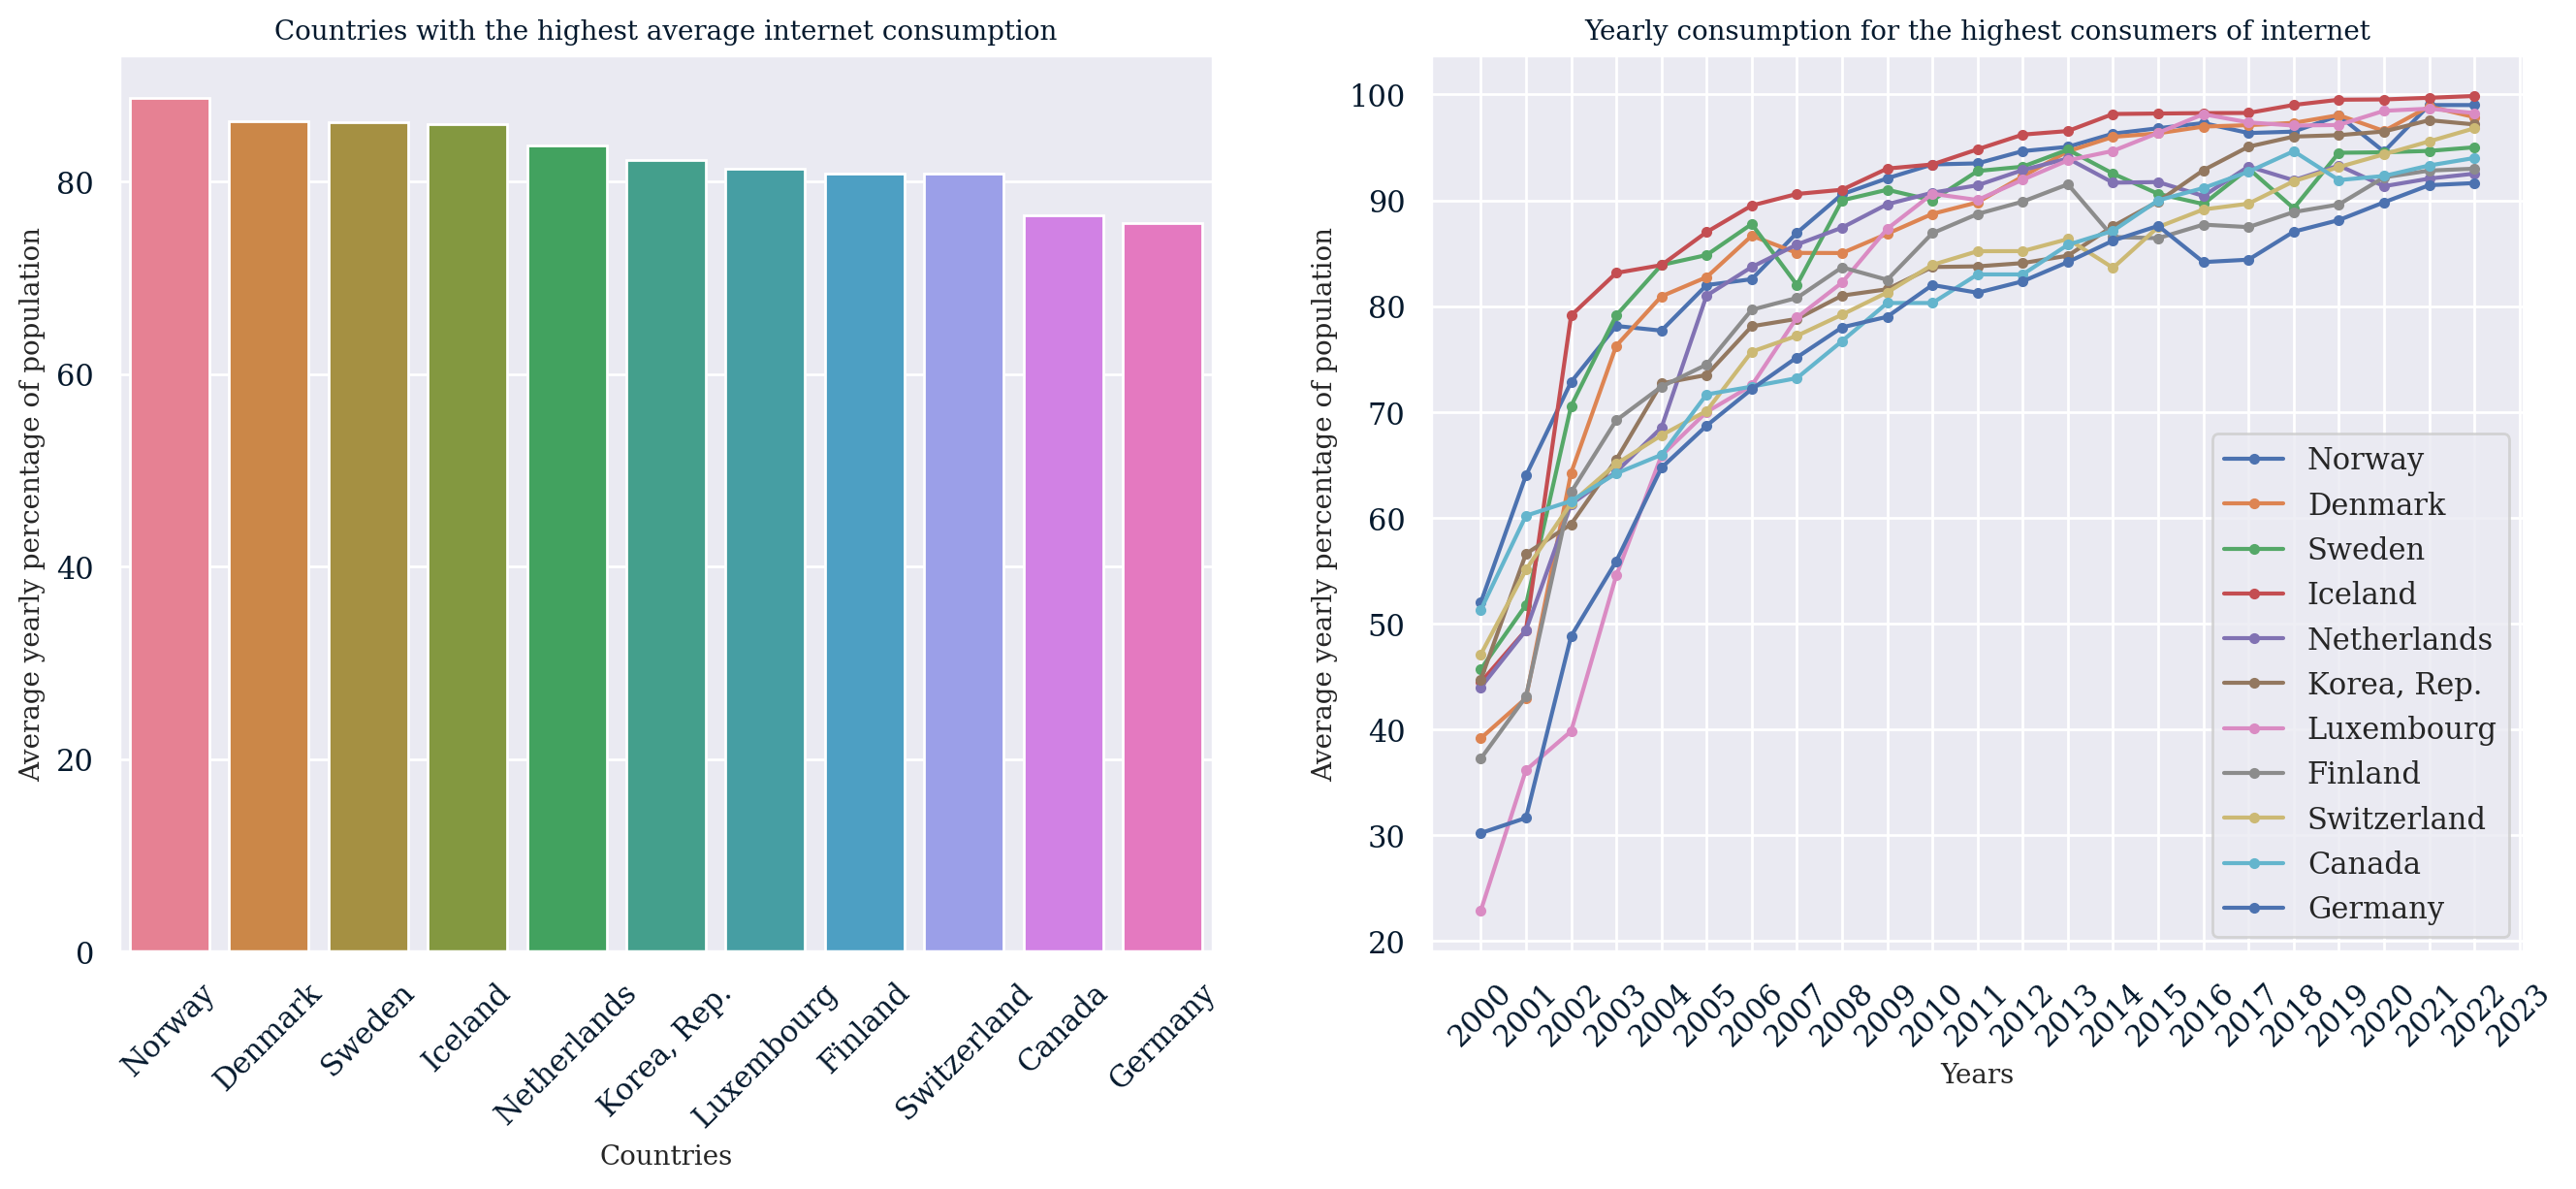

In [19]:
col_names = ['Country Name', 'Country Code', 'Mean_internet_pop']
internet_df_countrywise = internet_df.sort_values(by=['Mean_internet_pop'], ascending=False)

highest_countries = internet_df_countrywise.iloc[:11,:]
highest_only_pop = internet_df_countrywise[col_names].iloc[:11,:]
years = internet_df_countrywise.columns[2:-2]

plt.rcParams["font.family"]="serif"
plt.rcParams["font.size"] = 10

fig, axes = plt.subplots(1,2, figsize = [16,6])

sns.barplot(x='Country Name', y='Mean_internet_pop', data=highest_only_pop, hue="Country Name", ax=axes[0])
axes[0].set_xticks(ticks=highest_countries["Country Name"])
axes[0].set_ylabel("Average yearly percentage of population", fontsize=10)
axes[0].set_xlabel("Countries", fontsize=10)
axes[0].set_title("Countries with the highest average internet consumption", fontsize = 10)

num_colors = len(highest_countries)
color_palette = cm.get_cmap('tab10', num_colors)

for j in range(len(highest_countries)):
    axes[1].plot(years[:-1], highest_countries.iloc[j,2:-3], marker = '.', linestyle= '-', label = highest_countries.iloc[j,0])
    axes[1].set_xticks(ticks=years)
    axes[1].set_ylabel("Average yearly percentage of population", fontsize=10)
    axes[1].set_xlabel("Years", fontsize=10)
    axes[1].set_title("Yearly consumption for the highest consumers of internet", fontsize = 10)
    axes[1].legend()

for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

#### Country wise ordering (bottom 10 countries)
- Bar plot of bottom 10 countries(by mean of the years)
- Line plot depicting the distribution over the years

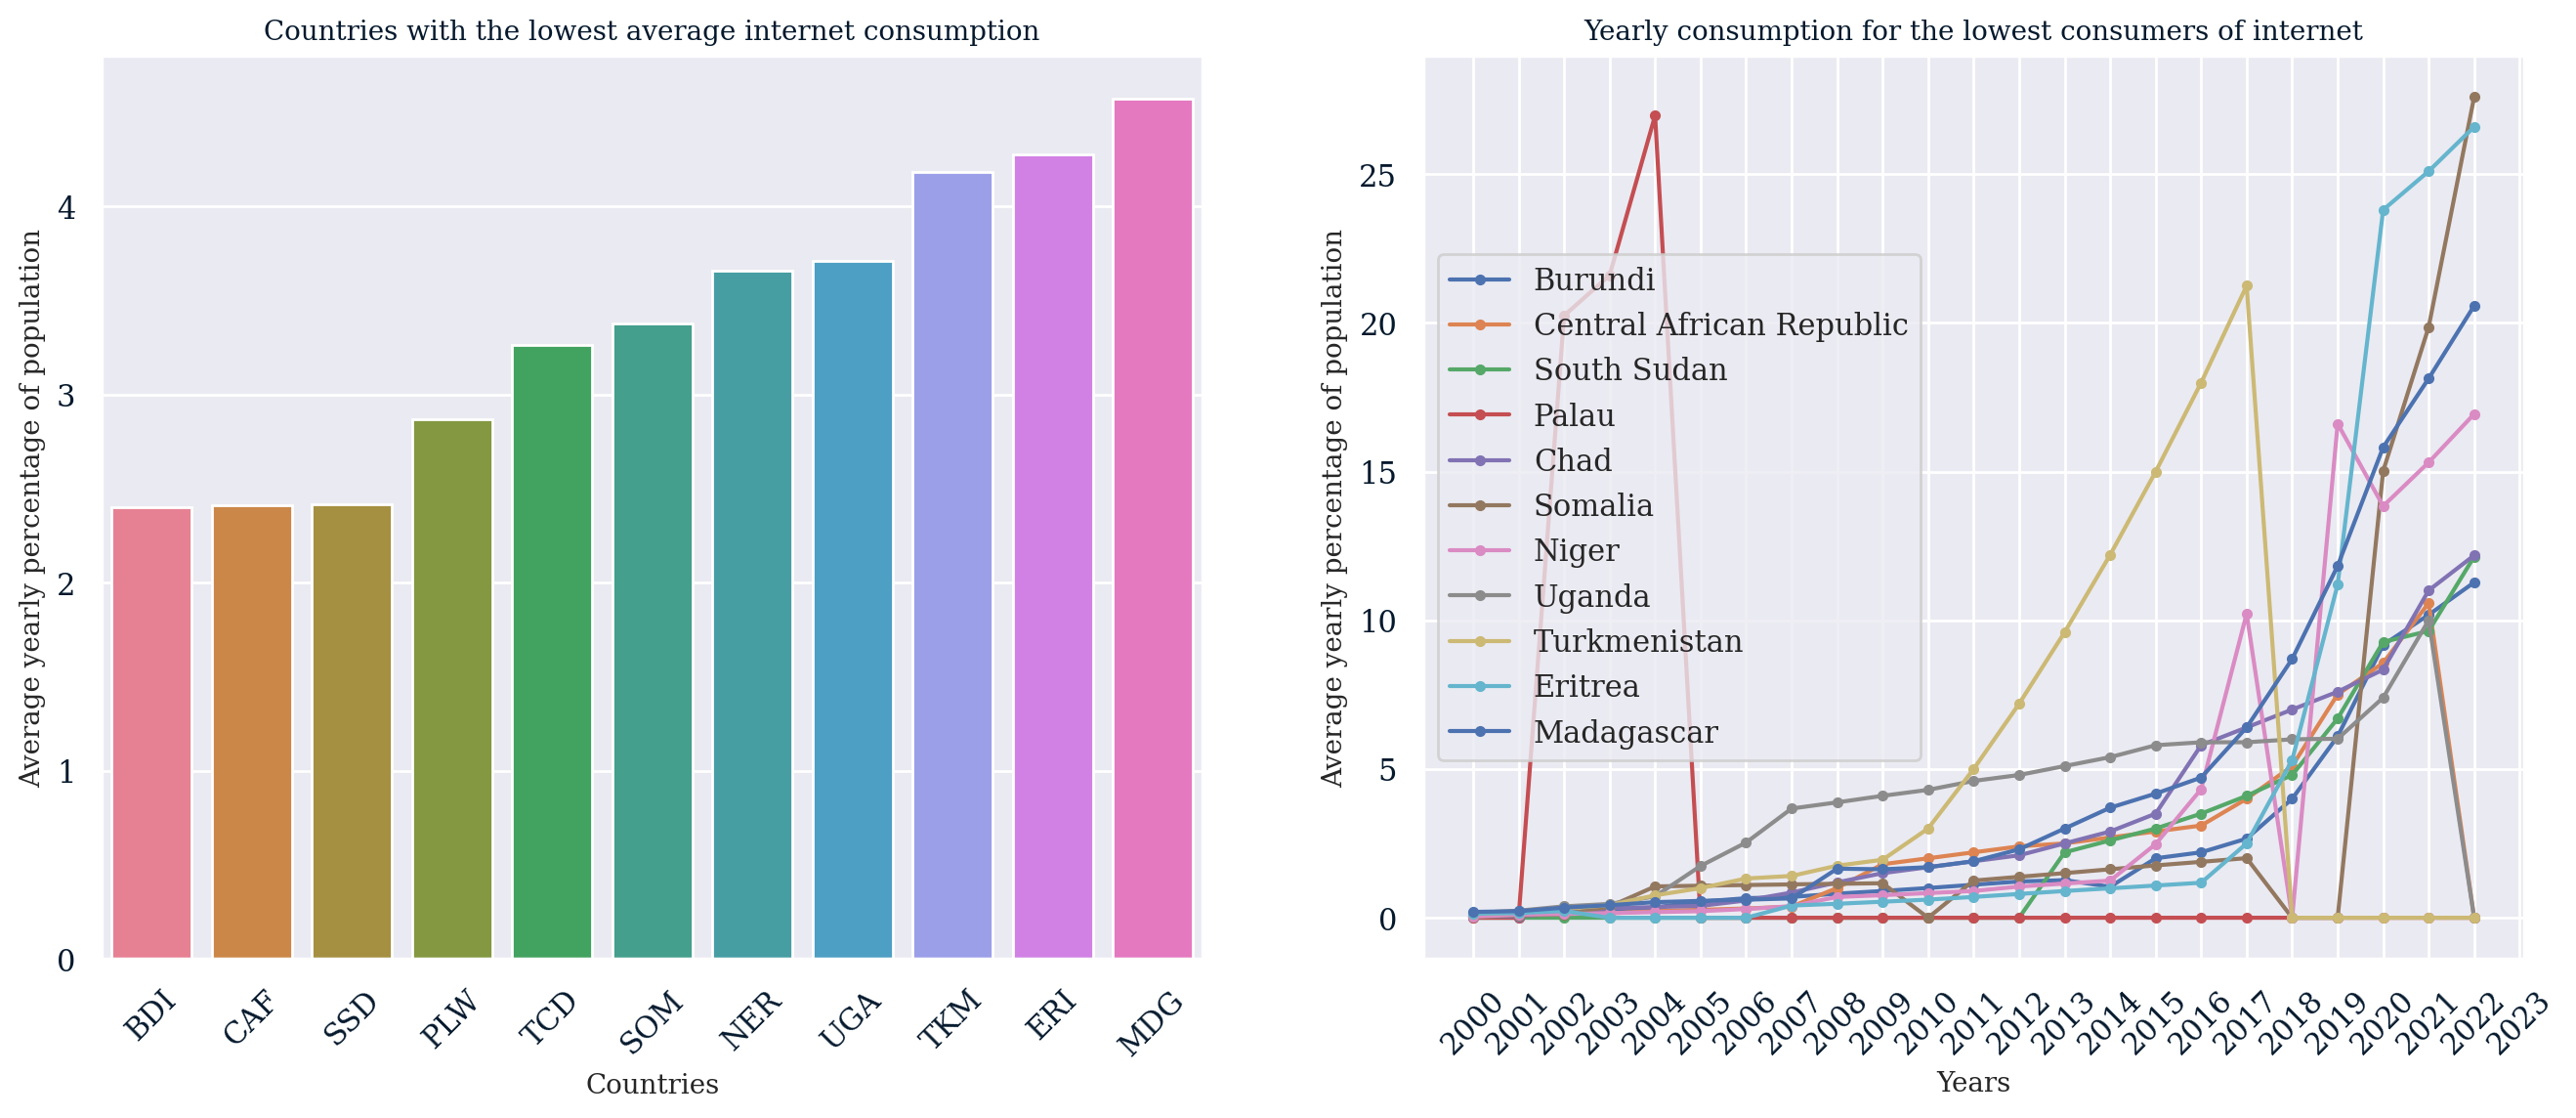

In [20]:
col_names = ['Country Name', 'Country Code', 'Mean_internet_pop']
internet_df_countrywise = internet_df.sort_values(by=['Mean_internet_pop'], ascending=True)

cols = internet_df_countrywise.columns[2:-2]
internet_df_filtered = internet_df_countrywise[~internet_df_countrywise[cols].eq(0).all(axis=1)]

lowest_countries = internet_df_filtered.iloc[:11,:]
lowest_only_pop = internet_df_filtered[col_names].iloc[:11,:]
years = internet_df_countrywise.columns[2:-2]

plt.rcParams["font.family"]="serif"
plt.rcParams["font.size"] = 10

fig, axes = plt.subplots(1,2, figsize = [16,6])

sns.barplot(x='Country Code', y='Mean_internet_pop', data=lowest_only_pop, hue="Country Code", ax=axes[0])
axes[0].set_xticks(ticks=lowest_countries["Country Code"])
axes[0].set_ylabel("Average yearly percentage of population", fontsize=10)
axes[0].set_xlabel("Countries", fontsize=10)
axes[0].set_title("Countries with the lowest average internet consumption", fontsize = 10)

num_colors = len(highest_countries)
color_palette = cm.get_cmap('tab10', num_colors)

for j in range(len(highest_countries)):
    axes[1].plot(years[:-1], lowest_countries.iloc[j,2:-3], marker = '.', linestyle= '-', label = lowest_countries.iloc[j,0])
    axes[1].set_xticks(ticks=years)
    axes[1].set_ylabel("Average yearly percentage of population", fontsize=10)
    axes[1].set_xlabel("Years", fontsize=10)
    axes[1].set_title("Yearly consumption for the lowest consumers of internet", fontsize = 10)
    axes[1].legend()

for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

- **Following this preliminary analysis, further data analysis and internet usage visualization has been carried out in Tableau.**
- **Specifically, mean internet usage over the two decades has been analyzed for all the countries.**
- **Options has been added for interactivity to observe usage over particular years or ranges.**
- **Internet usage for a particular continent over the years has also been analyzed.**
- **Internet usage comparisons among the different continents for particular years as well as average have also been analyzed.**
- **The progression of internet usage over the years for the top 20 countries with the highest internet usage has also been plotted.**
- **Furthermore, comparisons of internet usage for a particular country in respect to the continental avaerage has also been depicted in this [Tableau dashboard](https://public.tableau.com/app/profile/samarpan.chakraborty/viz/InternetUsage_17397761505600/InternetUsageSummary?publish=yes)**